In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import cv2
import os

In [2]:
def createImageFeatures(image, size=(32, 32)):
    # resize the image
    image = cv2.resize(image, size)
    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

def label_img(image): 
    word_label = image_path.split(os.path.sep)[-1].split(".")[0]
    
    if word_label == 'cat': return [0]
    
    elif word_label == 'dog': return [1] 

In [3]:
print("Reading all images")
image_paths = list(paths.list_images("train"))
raw_images = []
labels = []

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    #label = image_path.split(os.path.sep)[-1].split(".")[0]
    # extract raw pixel intensity "features
    label = label_img(image)
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

Reading all images


In [4]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(raw_images)
X=scalar.transform(raw_images)

In [5]:
raw_images = np.array(X)
labels = np.array(labels)

In [7]:
(train_X, test_X, train_y, test_y) = train_test_split(
    raw_images, labels, test_size=0.30, random_state=60)

# KNN Classifier

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y.ravel())
acc = model.score(test_X, test_y.ravel())
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

Raw pixel accuracy: 55.37%


# KNN Classifier accuracy: 55.37%

In [11]:
prediction = model.predict(test_X)

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

In [14]:
#Confusion Matrix
cm = metrics.confusion_matrix(test_y, prediction)
print(cm)

[[2795  965]
 [2382 1358]]


# Confusion Matrix for KNN Classifier

Text(0.5, 1.0, 'Accuracy Score: 0.5537333333333333')

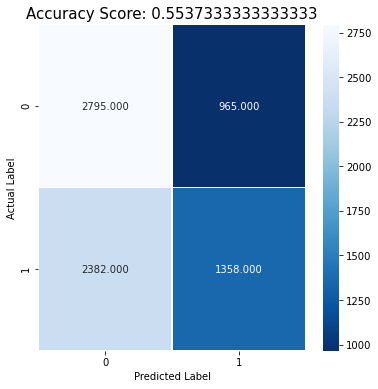

In [16]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_X,train_y.ravel())


C:\Users\Bhupesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
prediction2 = logreg.predict(test_X)
#Measure Model Performance: accuracy score 
score = logreg.score(test_X,test_y)
print("Logistic Regression model accuracy: {:.2f}%".format(score * 100))

Logistic Regression model accuracy: 59.37%


# Logistic Regression model accuracy: 59.37%

In [25]:
#Confusion Matrix
cm1 = metrics.confusion_matrix(test_y, prediction2)
print(cm1)

[[2346 1414]
 [1633 2107]]


# Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Accuracy Score: 0.5937333333333333')

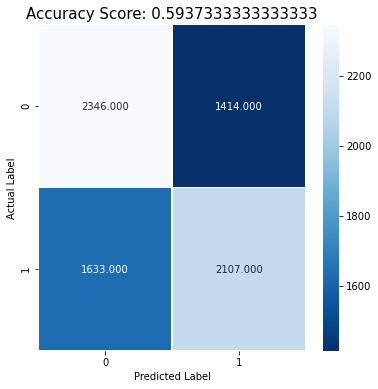

In [26]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(6,6))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

# Support vector Classifier

In [29]:
from sklearn import svm
svm2=svm.SVC(max_iter=-1, kernel='rbf', class_weight='balanced',gamma='scale') 
svm2.fit(train_X,train_y.ravel())

In [33]:
acc3 = svm2.score(test_X, test_y.ravel())
print("SVM model accuracy: {:.2f}%".format(acc3 * 100))

SVM model accuracy: 68.93%


# SVM model accuracy: 68.93%

In [36]:
prediction3 = svm2.predict(test_X)

In [37]:
#Confusion Matrix
cm3 = metrics.confusion_matrix(test_y, prediction3)
print(cm3)

[[2641 1119]
 [1211 2529]]


# Confusion Matrix for SVM

Text(0.5, 1.0, 'Accuracy Score: 0.6893333333333334')

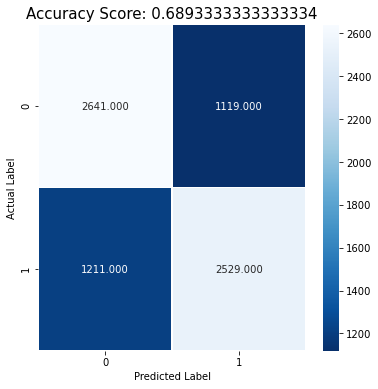

In [38]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(acc3)
plt.title(all_sample_title, size = 15)